# CA01: Exploratory Data Analysis (EDA) - House Price Analysis

Understanding, pre-processing, and post-processing are key steps in handling our data:

## 1. Understanding the Dataset

Understanding our data is the first step. This includes:

- Variable analysis
- Exploration and Visualization

## 2. Pre-processing

Pre-processing involves preparing our data for analysis. This includes:

- Identifying and handling missing values
- Dealing with outliers
- Encoding data to correct format
- Binning
- Normalization
- Duplicates removal

## 3. Post-processing

Post-processing involves reviewing our data after analysis. This includes:

- Perform a collinearity test to identify highly correlated variables
- Identify and remove unnecessary variables

Remember, the goal of this process is to ensure the quality of our data at each step of our analysis.

In [3]:
#loading all the requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.knn import KNN
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [4]:
#loading the data
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')
df.head()

#displaying all columns in a list
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

1. Data Understanding

In this portion we are going to create a data quality report to understand the quality of our data. The report will be broken into two parts:
- Data Quality Report for Continous Features
- Data Quality Report for Categorical Features

Then we are going to explore our data by visualizing our data using the following plots:
- Histograms
- Boxplots
- Scatterplots


In [5]:
#initiating a table for the data quality report for continuous values
quality_report_continuous = pd.DataFrame(columns=['Feature', 'Count', 'Missing_percentage', 'Cardinality', 'Min','Qrt1','Mean','Median','Qrt3','Max','Std_dev'])
#selecting only the continuous values
df_continuous = df.select_dtypes(include=[np.number])
df_continuous


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [6]:
#adding the features to the quality report table
quality_report_continuous['Feature'] = df_continuous.columns

#adding the count of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Count'][i] = df_continuous.iloc[:,i].count()

#adding the missing percentage of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Missing_percentage'][i] = round((df_continuous.iloc[:,i].isnull().sum()/df_continuous.shape[0])*100,2)

#adding the cardinality of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Cardinality'][i] = df_continuous.iloc[:,i].nunique()

#adding the minimum value of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Min'][i] = df_continuous.iloc[:,i].min()

#adding the 1st quartile value of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Qrt1'][i] = df_continuous.iloc[:,i].quantile(0.25)

#adding the mean value of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Mean'][i] = df_continuous.iloc[:,i].mean()

#adding the median value of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Median'][i] = df_continuous.iloc[:,i].median()

#adding the 3rd quartile value of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Qrt3'][i] = df_continuous.iloc[:,i].quantile(0.75)

#adding the maximum value of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Max'][i] = df_continuous.iloc[:,i].max()

#adding the standard deviation of values to the quality report table
for i in range(len(df_continuous.columns)):
  quality_report_continuous['Std_dev'][i] = df_continuous.iloc[:,i].std()

In [7]:
#initiating a table for the data quality report for categorical values
quality_report_categorical = pd.DataFrame(columns=['Feature', 'Count', 'Missing_percentage', 'Cardinality', 'Mode','Mode_freq','Mode_percentage','2nd_mode','2nd_mode_freq','2nd_mode_percentage'])

#selecting only the categorical values
df_categorical = df.select_dtypes(include=[object])
df_categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
#adding the features to the quality report table
quality_report_categorical['Feature'] = df_categorical.columns

#adding the count of values to the quality report table
for i in range(len(df_categorical.columns)):
  quality_report_categorical['Count'][i] = df_categorical.iloc[:,i].count()

#adding the missing percentage of values to the quality report table
for i in range(len(df_categorical.columns)):
  quality_report_categorical['Missing_percentage'][i] = round((df_categorical.iloc[:,i].isnull().sum()/df_categorical.shape[0])*100,2)

#adding the cardinality of values to the quality report table
for i in range(len(df_categorical.columns)):
  quality_report_categorical['Cardinality'][i] = df_categorical.iloc[:,i].nunique()

#adding the mode value of values to the quality report table
for i in range(len(df_categorical.columns)):
  quality_report_categorical['Mode'][i] = df_categorical.iloc[:,i].mode()[0]

#adding the mode frequency of values to the quality report table
for i in range(len(df_categorical.columns)):
  quality_report_categorical['Mode_freq'][i] = df_categorical.iloc[:,i].value_counts().max()

#adding the mode percentage of values to the quality report table
for i in range(len(df_categorical.columns)):
  quality_report_categorical['Mode_percentage'][i] = round((df_categorical.iloc[:,i].value_counts().max()/df_categorical.shape[0])*100,2)

#adding the 2nd mode value of values to the quality report table
for i in range(len(df_categorical.columns)):
  quality_report_categorical['2nd_mode'][i] = df_categorical.iloc[:,i].value_counts().index[1]

#adding the 2nd mode frequency of values to the quality report table
for i in range(len(df_categorical.columns)):
  quality_report_categorical['2nd_mode_freq'][i] = df_categorical.iloc[:,i].value_counts()[1]

#adding the 2nd mode percentage of values to the quality report table
for i in range(len(df_categorical.columns)):
  quality_report_categorical['2nd_mode_percentage'][i] = round((df_categorical.iloc[:,i].value_counts()[1]/df_categorical.shape[0])*100,2)

In [9]:
#displaying the quality report for continuous values
quality_report_continuous

,Feature,Count,Missing_percentage,Cardinality,Min,Qrt1,Mean,Median,Qrt3,Max,Std_dev
0,Id,1460,0.0,1460,1,365.75,730.5,730.5,1095.25,1460,421.610009
1,MSSubClass,1460,0.0,15,20,20.0,56.89726,50.0,70.0,190,42.300571
2,LotFrontage,1201,17.74,110,21.0,59.0,70.049958,69.0,80.0,313.0,24.284752
3,LotArea,1460,0.0,1073,1300,7553.5,10516.828082,9478.5,11601.5,215245,9981.264932
4,OverallQual,1460,0.0,10,1,5.0,6.099315,6.0,7.0,10,1.382997
5,OverallCond,1460,0.0,9,1,5.0,5.575342,5.0,6.0,9,1.112799
6,YearBuilt,1460,0.0,112,1872,1954.0,1971.267808,1973.0,2000.0,2010,30.202904
7,YearRemodAdd,1460,0.0,61,1950,1967.0,1984.865753,1994.0,2004.0,2010,20.645407
8,MasVnrArea,1452,0.55,327,0.0,0.0,103.685262,0.0,166.0,1600.0,181.066207
9,BsmtFinSF1,1460,0.0,637,0,0.0,443.639726,383.5,712.25,5644,456.098091


In [10]:
#displaying the quality report for categorical values
quality_report_categorical

,Feature,Count,Missing_percentage,Cardinality,Mode,Mode_freq,Mode_percentage,2nd_mode,2nd_mode_freq,2nd_mode_percentage
0,MSZoning,1460,0.0,5,RL,1151,78.84,RM,218,14.93
1,Street,1460,0.0,2,Pave,1454,99.59,Grvl,6,0.41
2,Alley,91,93.77,2,Grvl,50,3.42,Pave,41,2.81
3,LotShape,1460,0.0,4,Reg,925,63.36,IR1,484,33.15
4,LandContour,1460,0.0,4,Lvl,1311,89.79,Bnk,63,4.32
5,Utilities,1460,0.0,2,AllPub,1459,99.93,NoSeWa,1,0.07
6,LotConfig,1460,0.0,5,Inside,1052,72.05,Corner,263,18.01
7,LandSlope,1460,0.0,3,Gtl,1382,94.66,Mod,65,4.45
8,Neighborhood,1460,0.0,25,NAmes,225,15.41,CollgCr,150,10.27
9,Condition1,1460,0.0,9,Norm,1260,86.3,Feedr,81,5.55


2. Data Pre-processing

2.1. Missing Values


In [11]:
#removing the columns based on their high missing percentage
df = df.drop(['Alley','PoolQC','Fence','MiscFeature', 'MasVnrType'],axis=1)
df.shape

(1460, 76)

In [12]:
#for other columns with missing values, we will impute the missing values with the mean of the column
numeric = df.select_dtypes(include=[np.number]) #selecting only the numeric columns
numeric_columns = numeric.columns #selecting the column names of the numeric columns

#imputing the missing values with the mean of the column
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

#checking if the missing values have been imputed
df.isnull().sum().to_list()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
#now we will inspect the categorical columns
boolean_columns = df.select_dtypes(include=[object]).columns.tolist()
df[boolean_columns] = df[boolean_columns].astype('str')

df[boolean_columns]

#fill the missing values with the mode of the column
df[boolean_columns].fillna(df.mode())

#checking if the missing values have been imputed
df.isna().sum()/len(df)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 76, dtype: float64

In [14]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


2.2. Outliers

In [15]:
#removing the outliers from the numerical columns
lower = df[numeric_columns].quantile(.05)
upper = df[numeric_columns].quantile(.95)

df[numeric_columns] = df[numeric_columns].clip(lower=lower, upper=upper, axis=1)

df.shape

(1460, 76)

In [16]:
# #Using KNN to detect outliers

# #creating a KNN model
# knn = KNN()

# #fitting the model
# knn.fit(df[numeric_columns])

# #predicting the outliers
# outliers = knn.predict(df[numeric_columns])

# #convert the outliers to a dataframe
# outlier_df = pd.DataFrame(outliers, columns=['Outlier'])

# # Reset the indices
# df.reset_index(drop=True, inplace=True)
# outlier_df.reset_index(drop=True, inplace=True)

# # Concatenate the outlier data with original DataFrame
# df_with_outliers = pd.concat([df, outlier_df], axis=1)

# # Filter out the outliers
# df_filtered = df_with_outliers[df_with_outliers['Outlier'] == 0].drop('Outlier', axis=1)

2.3. Encoding Data

In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
# The result is a sparse matrix
one_hot_encoded_matrix = one_hot_encoder.fit_transform(df[categorical_cols])

# Get feature names for categorical columns after one-hot encoding
cat_one_hot_features = one_hot_encoder.get_feature_names_out(categorical_cols)

# Convert the sparse matrix to a dense format and create a DataFrame
df_categorical_encoded = pd.DataFrame(one_hot_encoded_matrix.toarray(), columns=cat_one_hot_features)
df_categorical_encoded

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
#combine the categorical and numerical columns
df_combined = pd.concat([df[numeric_columns], df_categorical_encoded], axis=1)
df_combined.shape

(1460, 284)

2.4. Scaling Data

In [19]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply scaling only to the numerical features
# We need to ensure we don't scale the one-hot encoded features
df_combined[numeric_columns] = scaler.fit_transform(df_combined[numeric_columns])

# Display the first few rows of the scaled dataframe
df_combined.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.580327,0.096076,-0.260425,-0.355260,0.761791,-0.577637,1.081424,0.885542,0.736464,0.667140,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.580327,-0.900519,0.648283,-0.023731,-0.054813,2.378030,0.145946,-0.427779,-0.659759,1.327216,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.580327,0.096076,-0.078684,0.451940,0.761791,-0.577637,1.012130,0.836900,0.494262,0.133255,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.580327,0.345225,-0.563328,-0.038146,0.761791,-0.577637,-1.932895,-0.719628,-0.659759,-0.521967,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.580327,0.096076,0.890605,1.319681,1.578396,-0.577637,0.977482,0.739617,1.833496,0.543376,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


2.5. Duplicates Removal

In [20]:
# Remove duplicate rows
df_final = df_combined.drop_duplicates()

3. Data Post-processing

In [22]:
# Collinearity Matrix
# Numerical features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdded', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold', 'MoSold', 'SalePrice']

columns_to_use = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold', 'MoSold', 'SalePrice']
matrix_data = df[columns_to_use]

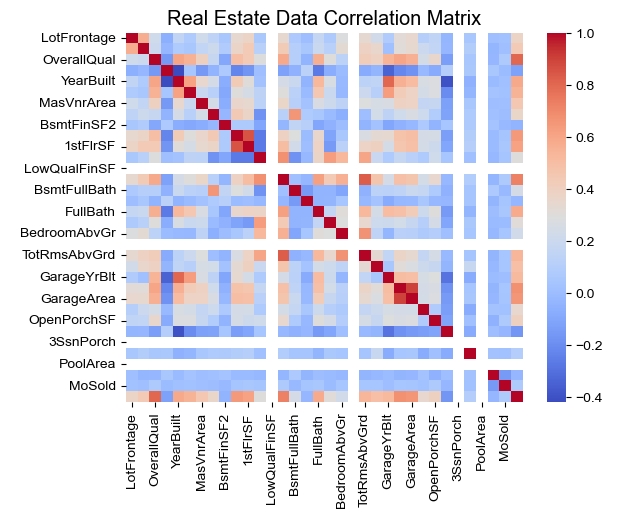

In [23]:
ax = plt.axes()
sns.heatmap(matrix_data.corr(), cmap = 'coolwarm', ax = ax, fmt='.2f');
sns.set(font_scale=1.2)
ax.set_title('Real Estate Data Correlation Matrix')

plt.show()


Team Contribution:
- Safiya: helps the team to check the quality of our data processing, suggestions on data cleaning process/methodology.
- Minh: codes primarily the framework for the data quality report and most of the data pre-processing.
- Shaye: codes the content of the data quality report and the data post processing(correlation matrix)